In [1]:
globals().clear()  # clear all variables

import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.15.0
Eager mode:  True
Hub version:  0.16.1
GPU is NOT AVAILABLE


In [3]:
test_percentage = 0.1
validation_percentage = 0.1

In [4]:
data = pd.read_csv('twitter.csv') #, encoding='latin1')

In [5]:
print(data.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [6]:
data = data.drop(columns=['id'])
print(data.head())

   label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation


In [35]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   label               31962 non-null  int64 
 1   tweet               31962 non-null  object
 2   length              31962 non-null  int64 
 3   preprocessed_tweet  31962 non-null  object
dtypes: int64(2), object(2)
memory usage: 998.9+ KB
None


In [36]:
print(data.describe())

              label        length
count  31962.000000  31962.000000
mean       0.070146     84.739628
std        0.255397     29.455749
min        0.000000     11.000000
25%        0.000000     63.000000
50%        0.000000     88.000000
75%        0.000000    108.000000
max        1.000000    274.000000


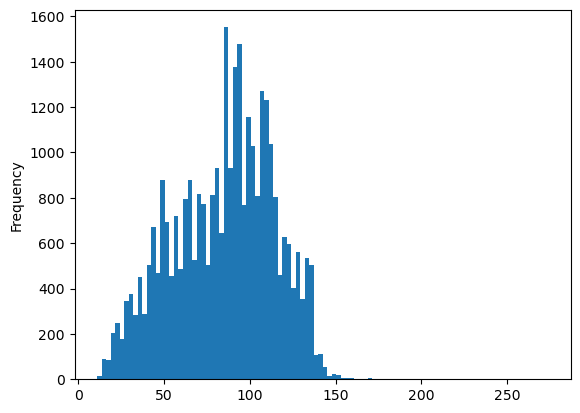

In [7]:
# Let's get the length of the messages
data['length']=data['tweet'].apply(len)

data['length'].plot(bins=100, kind='hist') 
plt.show()

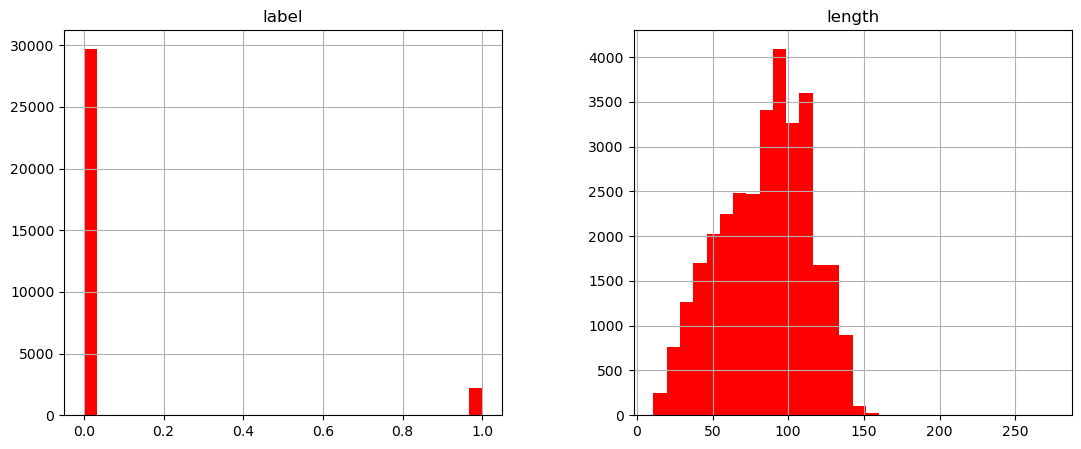

In [8]:
data.hist(bins = 30, figsize = (13,5), color = 'r')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


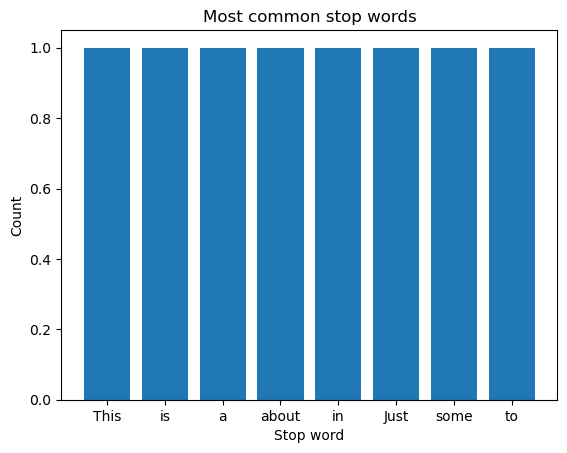

In [9]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Example list of tweets (replace with your actual data)
tweet = [
    "This is a sample tweet about stop words",
    "Another tweet containing common words like the, and, in",
    "Just some random text to demonstrate stop words",
]

# Get the list of stop words
stop_words = set(nltk.corpus.stopwords.words('english'))

# Count the occurrences of each stop word in the datasets
stop_word_counts = Counter([word for dataset in tweet for word in dataset.split() if word.lower() in stop_words])

# Get the 10 most common stop words
most_common_stop_words = stop_word_counts.most_common(10)

# Plot the graph
plt.bar([word[0] for word in most_common_stop_words], [word[1] for word in most_common_stop_words])
plt.title('Most common stop words')
plt.xlabel('Stop word')
plt.ylabel('Count')
plt.show()


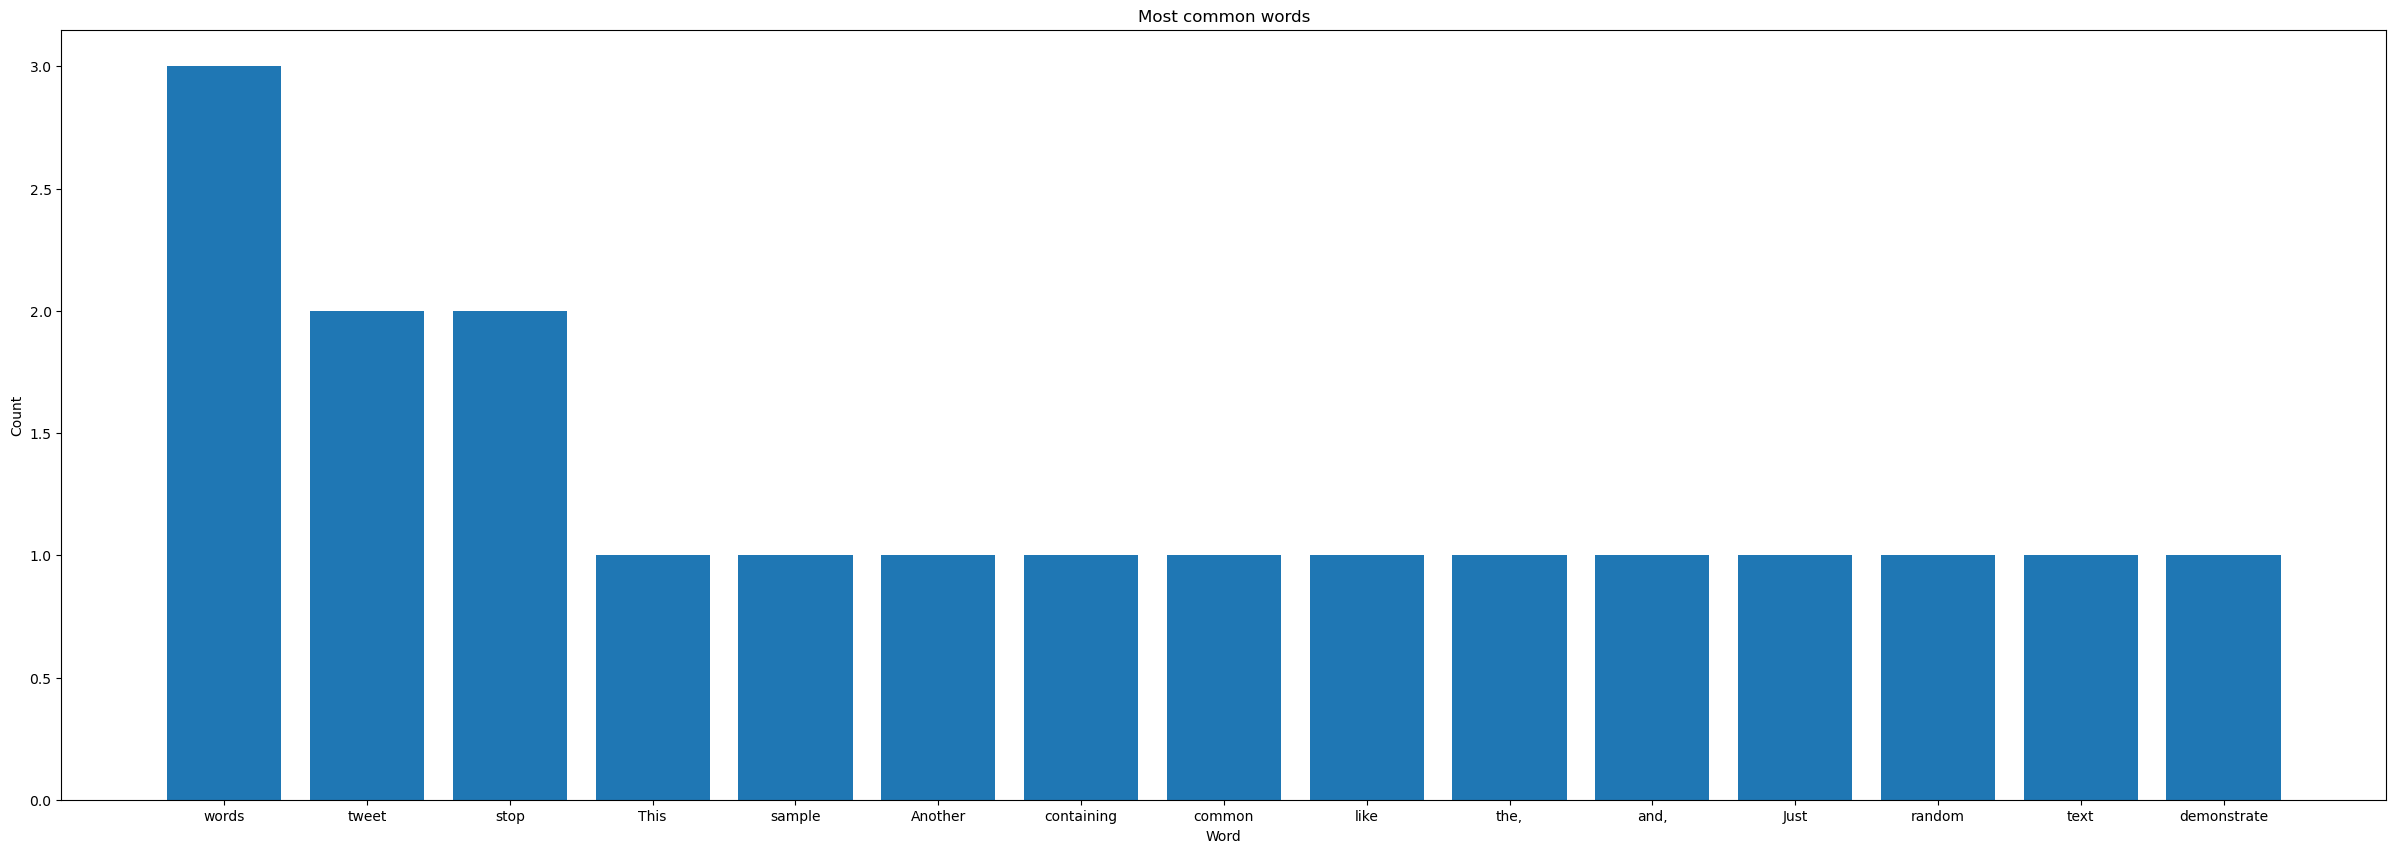

In [10]:
# Count the occurrences of each stop word in the datasets
word_counts = Counter([word for text in tweet for word in text.split() if word not in stop_words])

# Get the 35 most common words
most_common_words = word_counts.most_common(35)

# Set the figure size
plt.figure(figsize=(30, 10))

# Plot the graph
plt.bar([word[0] for word in most_common_words], [word[1] for word in most_common_words])
plt.title('Most common words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

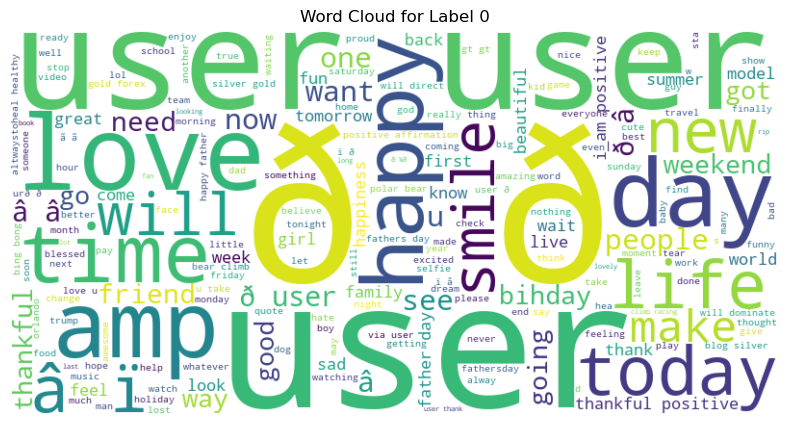

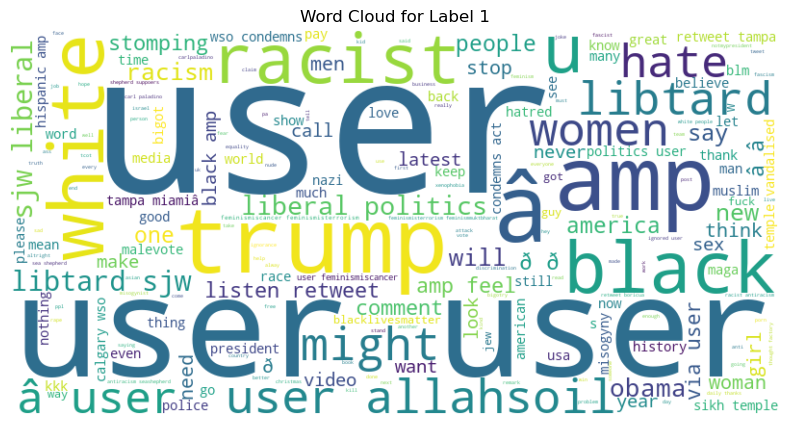

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter data for label 0
data_label_0 = data[data['label'] == 0]['tweet']

# Join all the tweets into a single string for label 0
all_tweets_label_0 = ' '.join(data_label_0)

# Create WordCloud object for label 0
wordcloud_label_0 = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_label_0)

# Filter data for label 1
data_label_1 = data[data['label'] == 1]['tweet']

# Join all the tweets into a single string for label 1
all_tweets_label_1 = ' '.join(data_label_1)

# Create WordCloud object for label 1
wordcloud_label_1 = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_label_1)

# Plot the WordCloud for label 0
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_label_0, interpolation='bilinear')
plt.title('Word Cloud for Label 0')
plt.axis('off')
plt.show()

# Plot the WordCloud for label 1
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_label_1, interpolation='bilinear')
plt.title('Word Cloud for Label 1')
plt.axis('off')
plt.show()


In [12]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,  PorterStemmer


# Define preprocessing function
def preprocess_text(text):
    if pd.isnull(text):  # Check for NaN values
        return ""
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')
    
    # Remove punctuation
    text = re.sub(r'\W', ' ', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization and Stemming
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    lemma_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    stemmed_tokens = [stemmer.stem(word) for word in lemma_tokens]
    
    # Join tokens back into string
    preprocessed_text = ' '.join(stemmed_tokens)
    
    return preprocessed_text


In [13]:
# Apply preprocessing to 'message' column
data['preprocessed_tweet'] = data['tweet'].apply(preprocess_text)

In [14]:
print(data.head())

   label                                              tweet  length  \
0      0   @user when a father is dysfunctional and is s...     102   
1      0  @user @user thanks for #lyft credit i can't us...     122   
2      0                                bihday your majesty      21   
3      0  #model   i love u take with u all the time in ...      86   
4      0             factsguide: society now    #motivation      39   

                                  preprocessed_tweet  
0  user father dysfunct selfish drag kid dysfunct...  
1  user user thank lyft credit use caus offer whe...  
2                                     bihday majesti  
3                        model love u take u time ur  
4                            factsguid societi motiv  


In [15]:
# Check the column names
print(data.columns)

Index(['label', 'tweet', 'length', 'preprocessed_tweet'], dtype='object')


In [16]:
X = data.preprocessed_tweet.values
y = data.label.values

In [17]:
# convert the labels into numbers
y == 0
y == 1
y = np.asarray(y).astype('float32')

In [18]:
# Partition the data into training and testing
test_examples = np.asarray(X[:round(test_percentage * len(X))])
train_examples = np.asarray(X[round(test_percentage * len(X)):])

In [19]:
test_labels = np.asarray(y[:round(test_percentage * len(X))])
train_labels = np.asarray(y[round(test_percentage * len(X)):])

In [20]:
print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))

Training entries: 28766, test entries: 3196


In [21]:
# Show subsample of the training examples and training labels
print("Training Examples:")
print(train_examples[:10])

print("\nTraining Labels:")
print(train_labels[:10])


Training Examples:
['speech one aft anoth becom better power meaning definit next pre'
 'user surpris read make gt gt gt betray ka lt lt lt scifi kindleunlimit'
 'final much laid back california mystiqu least regard warriorsfan wow'
 'imperfect make mistak learn mistak forgiv quot inspir'
 'lightroom bull domin bull direct whatev want yo'
 'summer truli sta see user grahamepark fun day poster user user'
 'user bihday good day puppi anim cute funni special day special'
 'disappoint user statement today thought better desper totallywrong'
 'littl 2 tomorrow go absolut fabul onesleep user may beat spo mont carlo xx'
 'user condol go peopl orlando pulseclub lgbtq imwithy']

Training Labels:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
# Build the model and show its layers; model has two fully connected layers with hidden units of 16 and 1, respectively
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
#model = "https://tfhub.dev/google/nnlm-en-dim50-with-normalization/2"
#model = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2"

In [23]:
#model architecture

hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))  # because it's binary classification
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48191433 (183.84 MB)
Trainable params: 48191433 (183.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# the loss function and metric are compatible with binary classification scenarios
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [25]:
# extracting validation examples from the training data
x_val = train_examples[:round(validation_percentage * len(train_examples))]
partial_x_train = train_examples[round(validation_percentage * len(train_examples)):]

In [26]:
y_val = train_labels[:round(validation_percentage * len(train_examples))]
partial_y_train = train_labels[round(validation_percentage * len(train_examples)):]

In [27]:
# training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)


Epoch 1/10



51/51 [==============================] - 19s 338ms/step - loss: 0.5375 - accuracy: 0.8652 - val_loss: 0.3633 - val_accuracy: 0.9287
Epoch 2/10
51/51 [==============================] - 17s 329ms/step - loss: 0.2618 - accuracy: 0.9312 - val_loss: 0.2184 - val_accuracy: 0.9312
Epoch 3/10
51/51 [==============================] - 17s 329ms/step - loss: 0.1780 - accuracy: 0.9363 - val_loss: 0.1807 - val_accuracy: 0.9364
Epoch 4/10
51/51 [==============================] - 17s 329ms/step - loss: 0.1369 - accuracy: 0.9479 - val_loss: 0.1571 - val_accuracy: 0.9465
Epoch 5/10
51/51 [==============================] - 17s 332ms/step - loss: 0.1071 - accuracy: 0.9621 - val_loss: 0.1435 - val_accuracy: 0.9496
Epoch 6/10
51/51 [==============================] - 17s 330ms/step - loss: 0.0843 - accuracy: 0.9712 - val_loss: 0.1372 - val_accuracy: 0.9569
Epoch 7/10
51/51 [==============================] - 17s 331ms/step - loss: 0.0675 - accuracy: 0.9779 - val_loss: 0.1376 - val_accuracy: 0.9572
Epoch 8/10

In [28]:
# Get the history dictionary
history_dict = history.history

# Print keys in the history dictionary
print("Keys in History Dictionary:")
print(history_dict.keys())

Keys in History Dictionary:
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


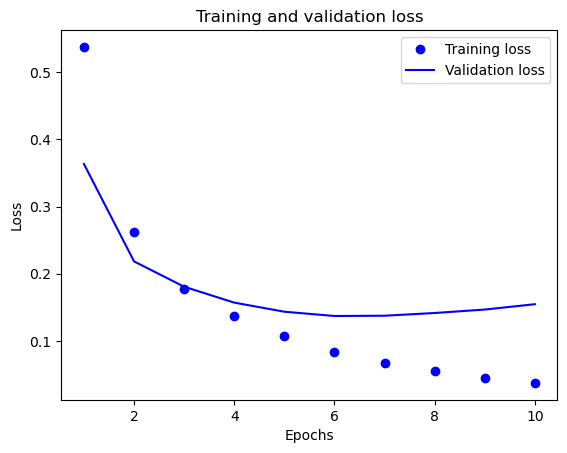

In [29]:
# Assignig values to the history dictionary to the metrics variable
acc_1 = history_dict['accuracy']
val_acc_1 = history_dict['val_accuracy']
loss_1 = history_dict['loss']
val_loss_1 = history_dict['val_loss']

epochs_1 = range(1, len(acc_1) + 1)

# Ploting the graph for training and validation loss vs epochs
# "bo" is for "blue dot"
plt.plot(epochs_1, loss_1, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_1, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

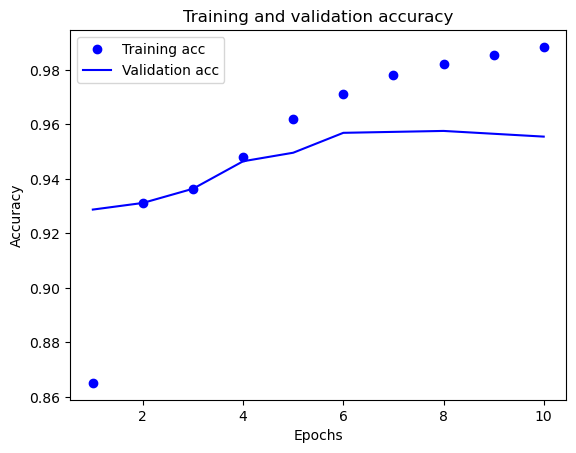

In [30]:
# Ploting the graph for training and validation accuracy vs epochs

plt.clf()

plt.plot(epochs_1, acc_1, 'bo', label='Training acc')
plt.plot(epochs_1, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [31]:
results = model.evaluate(test_examples, test_labels)  # this return loss value and accuracy
print(results)

100/100 [==============================] - 2s 21ms/step - loss: 0.1237 - accuracy: 0.9631
[0.12368986755609512, 0.9630788564682007]


In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define your 'predictions' variable here based on your model
predictions = model.predict(test_examples)
predictions[predictions >= 0] = 1
predictions[predictions < 0] = 0


# Calculate Accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy, "\n")

# Calculate ROC-AUC Score
roc_auc = roc_auc_score(test_labels, predictions)
print("ROC-AUC Score:", roc_auc, "\n")

# Precision
precision = precision_score(test_labels, predictions, average='weighted')
print("Precision:", precision, "\n")

# Recall
recall = recall_score(test_labels, predictions, average='weighted')
print("Recall:", recall, "\n")

# F1 Score
f1 = f1_score(test_labels, predictions, average='weighted')
print("F1 Score:", f1, "\n")

# Cohen's Kappa
kappa = cohen_kappa_score(test_labels, predictions)
print("Cohen's Kappa:", kappa, "\n")

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(test_labels, predictions)
print("Matthews Correlation Coefficient (MCC):", mcc, "\n")

# Classification Report
print("Classification Report:\n")
print(classification_report(test_labels, predictions))


100/100 [==============================] - 2s 19ms/step
Accuracy: 0.9630788485607009 

ROC-AUC Score: 0.8030104751691841 

Precision: 0.9603775208104646 

Recall: 0.9630788485607009 

F1 Score: 0.9607899883357599 

Cohen's Kappa: 0.6796811828578029 

Matthews Correlation Coefficient (MCC): 0.6865555541888572 

Classification Report:

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2974
         1.0       0.81      0.62      0.70       222

    accuracy                           0.96      3196
   macro avg       0.89      0.80      0.84      3196
weighted avg       0.96      0.96      0.96      3196



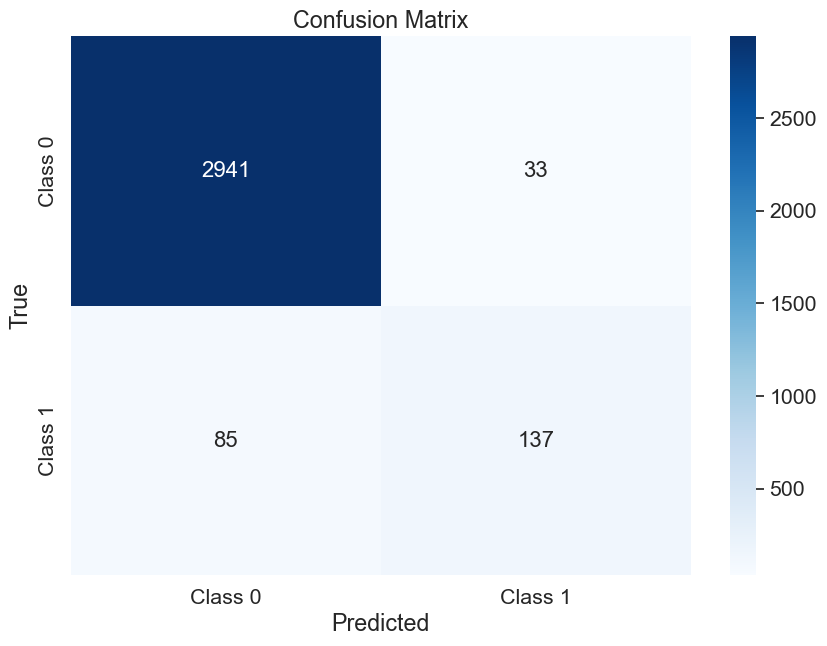

In [33]:
import seaborn as sns
# Calculate the confusion matrix
cm_1 = confusion_matrix(test_labels, predictions)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm_1, annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


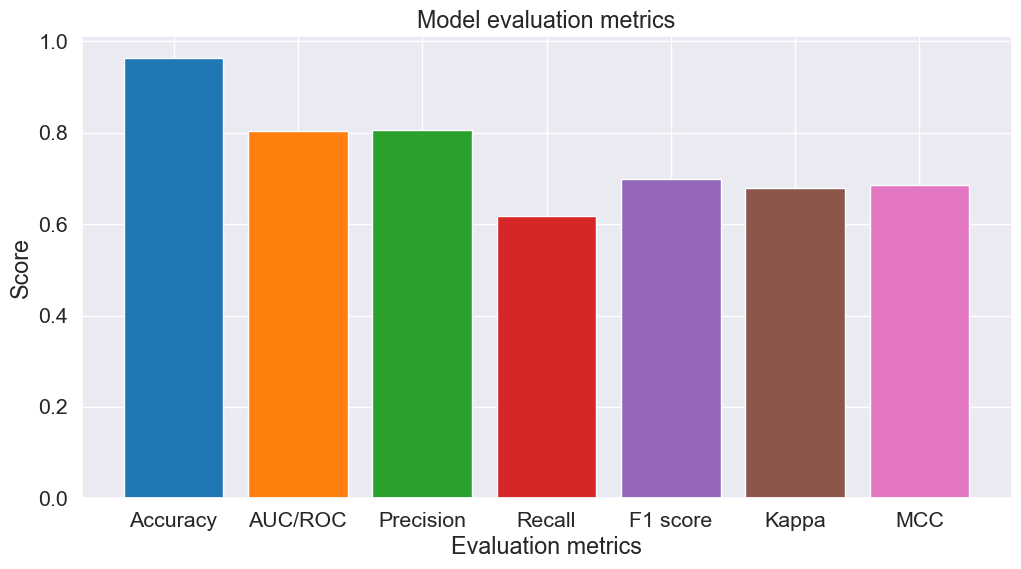

In [34]:
from sklearn import metrics

# Define the evaluation metric scores
accuracy = metrics.accuracy_score(test_labels, predictions)
roc_auc = metrics.roc_auc_score(test_labels, predictions)
precision = metrics.precision_score(test_labels, predictions)
recall = metrics.recall_score(test_labels, predictions)
f1 = metrics.f1_score(test_labels, predictions)
kappa = metrics.cohen_kappa_score(test_labels, predictions)
mcc = metrics.matthews_corrcoef(test_labels, predictions)

# Evaluation metrics names
metric_names = ['Accuracy', 'AUC/ROC', 'Precision', 'Recall', 'F1 score', 'Kappa', 'MCC']
scores = [accuracy, roc_auc, precision, recall, f1, kappa, mcc]

# Set the desired figure size (width, height)
plt.figure(figsize=(12, 6))

# Create a bar plot
plt.bar(metric_names, scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

# Add labels and title
plt.xlabel('Evaluation metrics')
plt.ylabel('Score')
plt.title('Model evaluation metrics')

# Show plot
plt.show()
